<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/07.1-Monitor_Status_Job_Instance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install qiskit-ibm-runtime
!pip install qiskit-experiments
!pip install imgaug==0.2.5
!pip install pylatexenc

In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


References:
* https://qiskit.org/ecosystem/ibm-runtime/how_to/retrieve_results.html
* https://qiskit.org/ecosystem/ibm-runtime/
* https://youtu.be/ozy0b7eE-lo (monitor a job)
* https://qiskit.org/documentation/apidoc/tools_jupyter.html




## Monitor Status of Job Instance

### Using job.status()

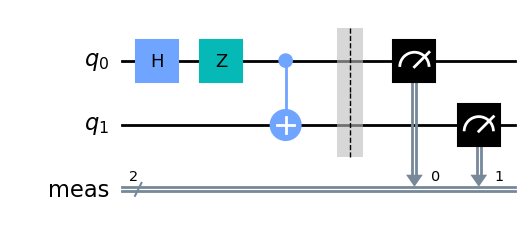

cjftbk45hqba891ll420
Status: JobStatus.RUNNING
Status: JobStatus.DONE


In [ ]:
import time

from qiskit import QuantumCircuit, execute
from qiskit_ibm_provider import IBMProvider

qc = QuantumCircuit(2)

qc.h(0)
qc.z(0)
qc.cx(0,1)
qc.measure_all()
display(qc.draw())

provider = IBMProvider(instance="ibm-q/open/main")
be = provider.get_backend("ibmq_qasm_simulator")

job = be.run(qc, shots=10000)
print(f"JobId: {job.job_id()}")
print(f"Status: {job.status()}")
time.sleep(30)
print(f"Status: {job.status()}")

### Using qiskit_ibm_runtime.QiskitRuntimeService

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
for j in service.jobs(backend_name="ibmq_qasm_simulator"):
  print(j) #last 10 jobs executed in this backend

print("========================================")

old_job = service.job(job.job_id()) #Retrieving the old job based on the job_id
print(f"Counts: {old_job.result().get_counts()}")

<RuntimeJob('cjftbk45hqba891ll420', 'circuit-runner')>
<RuntimeJob('cjftb6t7ui1f8qbafqb0', 'circuit-runner')>
<RuntimeJob('cjftb0f6dei066528nd0', 'circuit-runner')>
<RuntimeJob('cjftaof6dei066528dd0', 'circuit-runner')>
<RuntimeJob('cjftah0cs414jvh76mm0', 'circuit-runner')>
<RuntimeJob('cjft5nvbq0tlksvl5m10', 'circuit-runner')>
<RuntimeJob('cj9uhcmnq2dtf270lk0g', 'circuit-runner')>
<RuntimeJob('cj9uh843bgbkhno5qkgg', 'circuit-runner')>
<RuntimeJob('cj9ugj0l9m0cicojagp0', 'circuit-runner')>
<RuntimeJob('cj9ug2clik6102p2sq1g', 'circuit-runner')>
Counts: {'00': 4999, '11': 5001}


### using job.status() and job.wait_for_final_state()

In [15]:
from datetime import datetime
import pytz
from qiskit import QuantumCircuit
from qiskit_ibm_provider import IBMProvider

def time():
  tz = pytz.timezone('Europe/Paris')
  now = datetime.now(tz)
  return now.strftime("%H:%M:%S.%f")


qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.z(0)
qc.measure_all()

qc.draw()


provider=IBMProvider(instance="ibm-q/open/main")
be = provider.get_backend("ibmq_qasm_simulator")

print(time())
job = be.run(qc, shots=100000)
print(f"{time()} Status: {job.status()}")
job.wait_for_final_state()
print(f"{time()} Status: {job.status()}")

13:35:08.392776
13:35:09.471036 Status: JobStatus.RUNNING
13:35:12.836796 Status: JobStatus.DONE


### Using qiskit.tools.job_monitor

In [17]:
from qiskit import QuantumCircuit
from qiskit.tools import job_monitor

def time():
  tz = pytz.timezone('Europe/Paris')
  now = datetime.now(tz)
  return now.strftime("%H:%M:%S.%f")

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.z(0)
qc.measure_all()

qc.draw()

provider=IBMProvider(instance="ibm-q/open/main")
be = provider.get_backend("ibmq_qasm_simulator")
job = be.run(qc, shots=100000)
job_monitor(job)

Job Status: job has successfully run
